In [1]:
# part of the magwire package
# calculate magnetic fields arising from electrical current through wires of arbitrary shape
# with the law of Biot-Savart
# written by Michael Wack 2015
# wack@geophysik.uni-muenchen.de
# tested with python 3.4.3
# some basic calculations for testing
#
# edits, updates, and modifications by E.J. Brash - February, 2020

import numpy as np
import matplotlib.pyplot as plt

import os
import sys

sys.path.append(os.getcwd()+'/magfield')

import wire
import biotsavart

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


found 1 wire(s).
length of discretized path =  200
wire 1 has 199 segments
total number of segments: 199
number of field points: 13824
total number of calculations: 2750976
time needed for calculation: 0.8169311830000003 s
0.0005791805840289233
0.0006212657214777239
0.0006632883217893345
0.0007044803840646448
0.000744015757825068
0.0007810462418582684
0.0008147402566830927
0.0008443199481582725
0.0008690932400552895
0.0008884787292639522
0.0009020229520394947
0.0009094109446024628
0.0009104718128261342
0.0009051810785255598
0.0008936609742611324
0.0008761788672499781
0.0008531429425695832
0.0008250935145267243
0.0007926881520628607
0.0007566793523104728
0.0007178847201960271
0.0006771512185688258
0.0006353165724737449
0.0005931718498880233
0.0006096151590862417
0.0006565335545361973
0.0007035847009902415
0.0007498751753459202
0.000794436611534492
0.0008362712764877373
0.0008744009150539886
0.0009079130271092818
0.0009359997616127339
0.000957986713682684
0.0009733513638799182
0.00098173

0.0015565764829407332
0.0016983082515422464
0.0018278832334135801
0.0019409740069932734
0.0020345028139892455
0.0021065779060601545
0.0021562188771694765
0.0021830172968395345
0.00218684825721507
0.0021676995192877716
0.0021256463482767747
0.0020609754946262523
0.001974439609150397
0.0018675900543022024
0.0017430887378979073
0.0016048581174909835
0.0014579352821746275
0.0013079862544472705
0.0011605885044458154
0.0010205115563983122
0.0010476655149792434
0.0012118118825369948
0.0013889520095779159
0.001573221623578504
0.0017570980347593192
0.001932518427208858
0.0020921644888680616
0.0022304159571513438
0.0023436816861120017
0.0024301533167120546
0.002489241383284426
0.0025209681531815405
0.0025254934263708754
0.002502848543955733
0.00245289809428585
0.002375530760373898
0.0022710686966788177
0.0021408442546333147
0.001987805011997165
0.0018168992470106952
0.001634957187327733
0.001449929316835251
0.001269661283842836
0.0011006649316526549
0.0011207273457132353
0.0013181599804801035
0.

0.0014149780839860127
0.0020152130369974976
0.002872696714243488
0.0039699647729174135
0.005143091374189739
0.006166008233709691
0.006924110494674733
0.007435488126937911
0.007765489964593544
0.007972159083854825
0.008094199970282018
0.008154025242734595
0.008162254318960564
0.008120322219366306
0.008020849369031096
0.007845781341535752
0.007562392298540819
0.007118957238368693
0.006449200531119805
0.005509798561838789
0.004364358429475263
0.003216769448183329
0.0022707837312966233
0.001589579123686153
0.0014007956786510302
0.002051537126864517
0.0030273541330405112
0.004329218390871577
0.0057394894462224075
0.006940142757406909
0.0077906923070173
0.008338938726510427
0.00868028949545161
0.00888876931664082
0.00900989913389539
0.00906873103759896
0.009076795093120118
0.009035632170623987
0.008937274520547898
0.008761779344972862
0.008471410701547057
0.00800222700830873
0.00726262347898657
0.006175179196952914
0.004803998925982605
0.0034308186070222467
0.0023372434875591824
0.0015869688

0.0008799512316848723
0.0008316196950749008
0.0009247446336962489
0.001021265560004788
0.0011187728082699662
0.0012144811406274347
0.0013054644924718505
0.0013889116527178486
0.0014623432293320647
0.0015237466154539529
0.0015716169993900567
0.0016049226597302218
0.0016230300555985316
0.0016256263387273411
0.0016126685545092287
0.001584375864329496
0.0015412671323076714
0.00148423217696462
0.0014146114617235382
0.0013342485361393706
0.0012454774725718795
0.0011510195556486992
0.0010537902292276084
0.0009566500375579707
0.000862156250601136
0.0008105058054281607
0.0008982818998028695
0.0009889542404277348
0.0010803182788229244
0.0011698443624323731
0.0012548792058192247
0.0013328646627590423
0.001401525474562388
0.0014589904326631194
0.0015038360648562885
0.0015350663556848896
0.0015520567702228534
0.0015544935944413073
0.0015423334084018888
0.0015157968408158866
0.0014753986547909367
0.0014220039808703368
0.0013568891332313001
0.0012817772976811991
0.0011988186497995717
0.00111049513470

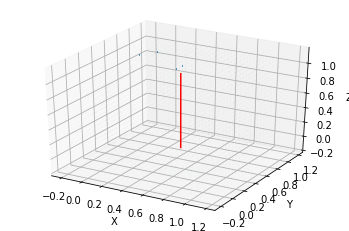

In [4]:
w = wire.Wire(path=wire.Wire.LinearPath([0.5,0.5,0.0],[0.5,0.5,1.0],pts=200), discretization_length=0.01, current=10000)
sol = biotsavart.BiotSavart(wire=w)

resolution = 0.06
volume_corner1 = (-.2, -.2, -.2)
volume_corner2 = (1.2, 1.2, 1.2)

grid = np.mgrid[volume_corner1[0]:volume_corner2[0]:resolution, volume_corner1[1]:volume_corner2[1]:resolution, volume_corner1[2]:volume_corner2[2]:resolution]

# create list of grid points
points = np.vstack(map(np.ravel, grid)).T
#for p in points:
#    print (p)

# calculate B field at given points
B = sol.CalculateB(points=points)
Babs = np.linalg.norm(B, axis=1)

for bs in Babs:
    print (bs)

# draw results
# remove big values close to the wire
cutoff = 0.002
minvalue = 0.0002

B[Babs > cutoff] = [np.nan,np.nan,np.nan]
B[Babs < minvalue] = [np.nan,np.nan,np.nan]

fig = plt.figure()
# 3d quiver
ax = fig.gca(projection='3d')
sol.mpl3d_PlotWires(ax)
ax.quiver(points[:, 0], points[:, 1], points[:, 2], B[:, 0], B[:, 1], B[:, 2], length=0.04)
plt.show()
